## Libraries

Import the necessary libraries for the evaluation of test subjects.

In [25]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from itertools import combinations
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## Import Data
Read CSV file and create DataFrame.

In [26]:
df = pd.read_csv('data/ground_truth.csv')  
print(df)

df_robotrainer = pd.read_csv('data/KATE_AA_dataset.csv', usecols=lambda col: col not in ["path_index_left", "path_index_front", "path_index_right", "hrv", "ppg_ch0", "ppg_ch1", "ppg_ch2", "ppg_ch3"])
print(df_robotrainer)


                          ID           1           2           3           4  \
0              Y-Balance [%]  114.502165  113.414634  103.212851  114.222222   
1                    SLS [-]    1.000000   12.000000    4.000000    1.000000   
2    Robotrainer [N] (vorne)  204.230000  209.660000  235.560000  201.040000   
3    Robotrainer [N] (links)  120.350000  173.880000  164.990000  180.270000   
4   Robotrainer [N] (rechts)  180.700000  180.530000  261.350000  216.680000   
5           Hgrip [kg] links   30.300000   39.400000   52.800000   56.800000   
6          Hgrip [kg] rechts   30.400000   41.200000   54.600000   64.700000   
7                   J&R [cm]   38.000000   48.000000   36.000000   60.000000   
8                 Tandem [s]   10.710000    7.800000   12.060000    7.650000   
9                    F8W [s]    6.870000    4.970000    4.290000    4.290000   
10                   SHH [-]   49.000000   37.000000   48.500000   52.000000   
11                  TBT [cm]   23.000000

1. Prints number of rows in DataFrame
2. Replaces first column's values with a list of names
3. Sets the first column as the index of the DataFrame

In [27]:
print(len(df))
df.iloc[:, 0] = [
    "Balance Test", "Single Leg Stance", "Robotrainer Front", "Robotrainer Left", "Robotrainer Right",
    "Hand Grip Left", "Hand Grip Right", "Jump & Reach", "Tandem Walk", "Figure 8 Walk",
    "Jumping Sideways", "Throwing Beanbag at Target", "Tapping Test", "Ruler Drop Test"
]
df.set_index(df.columns[0], inplace=True)

print(df)

14
                                     1           2           3           4  \
ID                                                                           
Balance Test                114.502165  113.414634  103.212851  114.222222   
Single Leg Stance             1.000000   12.000000    4.000000    1.000000   
Robotrainer Front           204.230000  209.660000  235.560000  201.040000   
Robotrainer Left            120.350000  173.880000  164.990000  180.270000   
Robotrainer Right           180.700000  180.530000  261.350000  216.680000   
Hand Grip Left               30.300000   39.400000   52.800000   56.800000   
Hand Grip Right              30.400000   41.200000   54.600000   64.700000   
Jump & Reach                 38.000000   48.000000   36.000000   60.000000   
Tandem Walk                  10.710000    7.800000   12.060000    7.650000   
Figure 8 Walk                 6.870000    4.970000    4.290000    4.290000   
Jumping Sideways             49.000000   37.000000   48.50000

Transposes DataFrame (swapping rows and columns).

In [28]:
numeric_df = df.T
print(numeric_df)
numeric_df.to_csv('data/motoric_test.csv', index=True)

ID  Balance Test  Single Leg Stance  Robotrainer Front  Robotrainer Left  \
1     114.502165                1.0             204.23            120.35   
2     113.414634               12.0             209.66            173.88   
3     103.212851                4.0             235.56            164.99   
4     114.222222                1.0             201.04            180.27   
5     107.058824                5.0             245.25            154.57   
6     110.833333                8.0              88.43            103.29   
7     114.529915                1.0             111.49             71.72   
8     101.666667                5.0             254.39            182.61   
9     107.291667                3.0             268.52            172.16   
10    118.518518                2.0             198.78            153.10   
11    109.166667                6.0             180.39             84.83   
12    106.172839                2.0             109.97             72.25   
13    105.95

## Pearson Correlation Coefficient
The Pearson correlation measures the linear relationship between two variables. It returns a value between -1 and 1:

- 1: Perfect positive correlation.
- -1: Perfect negative correlation.
- 0: No linear correlation.


In [29]:
correlation_matrix = numeric_df.corr(method='pearson')
print(correlation_matrix)

ID                          Balance Test  Single Leg Stance  \
ID                                                            
Balance Test                    1.000000          -0.398402   
Single Leg Stance              -0.398402           1.000000   
Robotrainer Front               0.047931           0.181189   
Robotrainer Left                0.127138           0.056483   
Robotrainer Right               0.060462          -0.024158   
Hand Grip Left                  0.058652           0.031534   
Hand Grip Right                -0.025830           0.052744   
Jump & Reach                    0.441906          -0.270069   
Tandem Walk                    -0.212451          -0.023090   
Figure 8 Walk                  -0.409233           0.178262   
Jumping Sideways                0.618960          -0.645249   
Throwing Beanbag at Target      0.315311          -0.306852   
Tapping Test                   -0.248650           0.287849   
Ruler Drop Test                -0.383533           0.36

In [30]:
correlation_matrix_robo = df_robotrainer.select_dtypes(include=[np.number]).corr(method='pearson')
print(correlation_matrix_robo)


                                        user      path      time  \
user                                1.000000 -0.005871 -0.061108   
path                               -0.005871  1.000000  0.284946   
time                               -0.061108  0.284946  1.000000   
force_input_raw_y                   0.154867  0.078081 -0.090593   
force_input_raw_x                   0.021107 -0.433779 -0.557349   
ppi                                -0.081880  0.018700  0.007590   
robot_pose_z                        0.059358 -0.803767 -0.507911   
robotrainer_deviation_left          0.021677 -0.286423 -0.137510   
robot_pose_y                       -0.076691  0.513930  0.215631   
output_data_linear_z               -0.003026  0.210819 -0.243561   
velocity_output_angular_z           0.011425 -0.121505  0.243853   
output_data_linear_x                0.021368 -0.433624 -0.557243   
virtual_force_resulting_force_y    -0.034218 -0.093210 -0.232461   
virtual_force_resulting_force_x     0.138556 -0.

### Heatmap

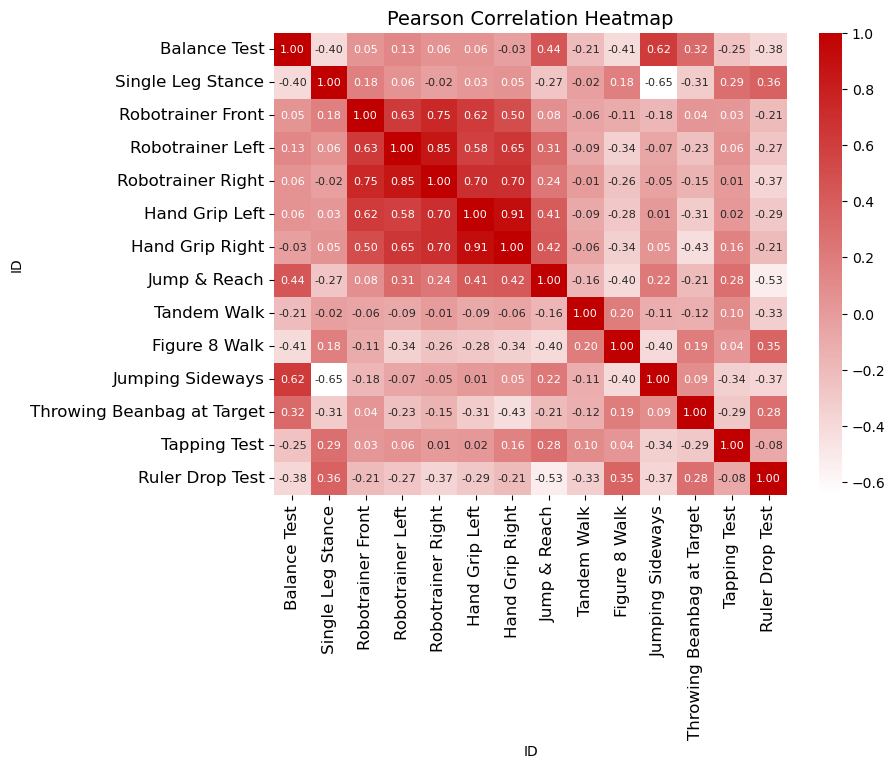

In [31]:
custom_cmap = LinearSegmentedColormap.from_list("custom_reds", ['#ffffff', '#c00000'])

plt.figure(figsize=(8.27, 6))

sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap=custom_cmap,  
    cbar=True,
    annot_kws={"size": 8}
)

plt.title("Pearson Correlation Heatmap", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.savefig('figures/pearson_ground_truth.pdf', format='pdf')

plt.show()

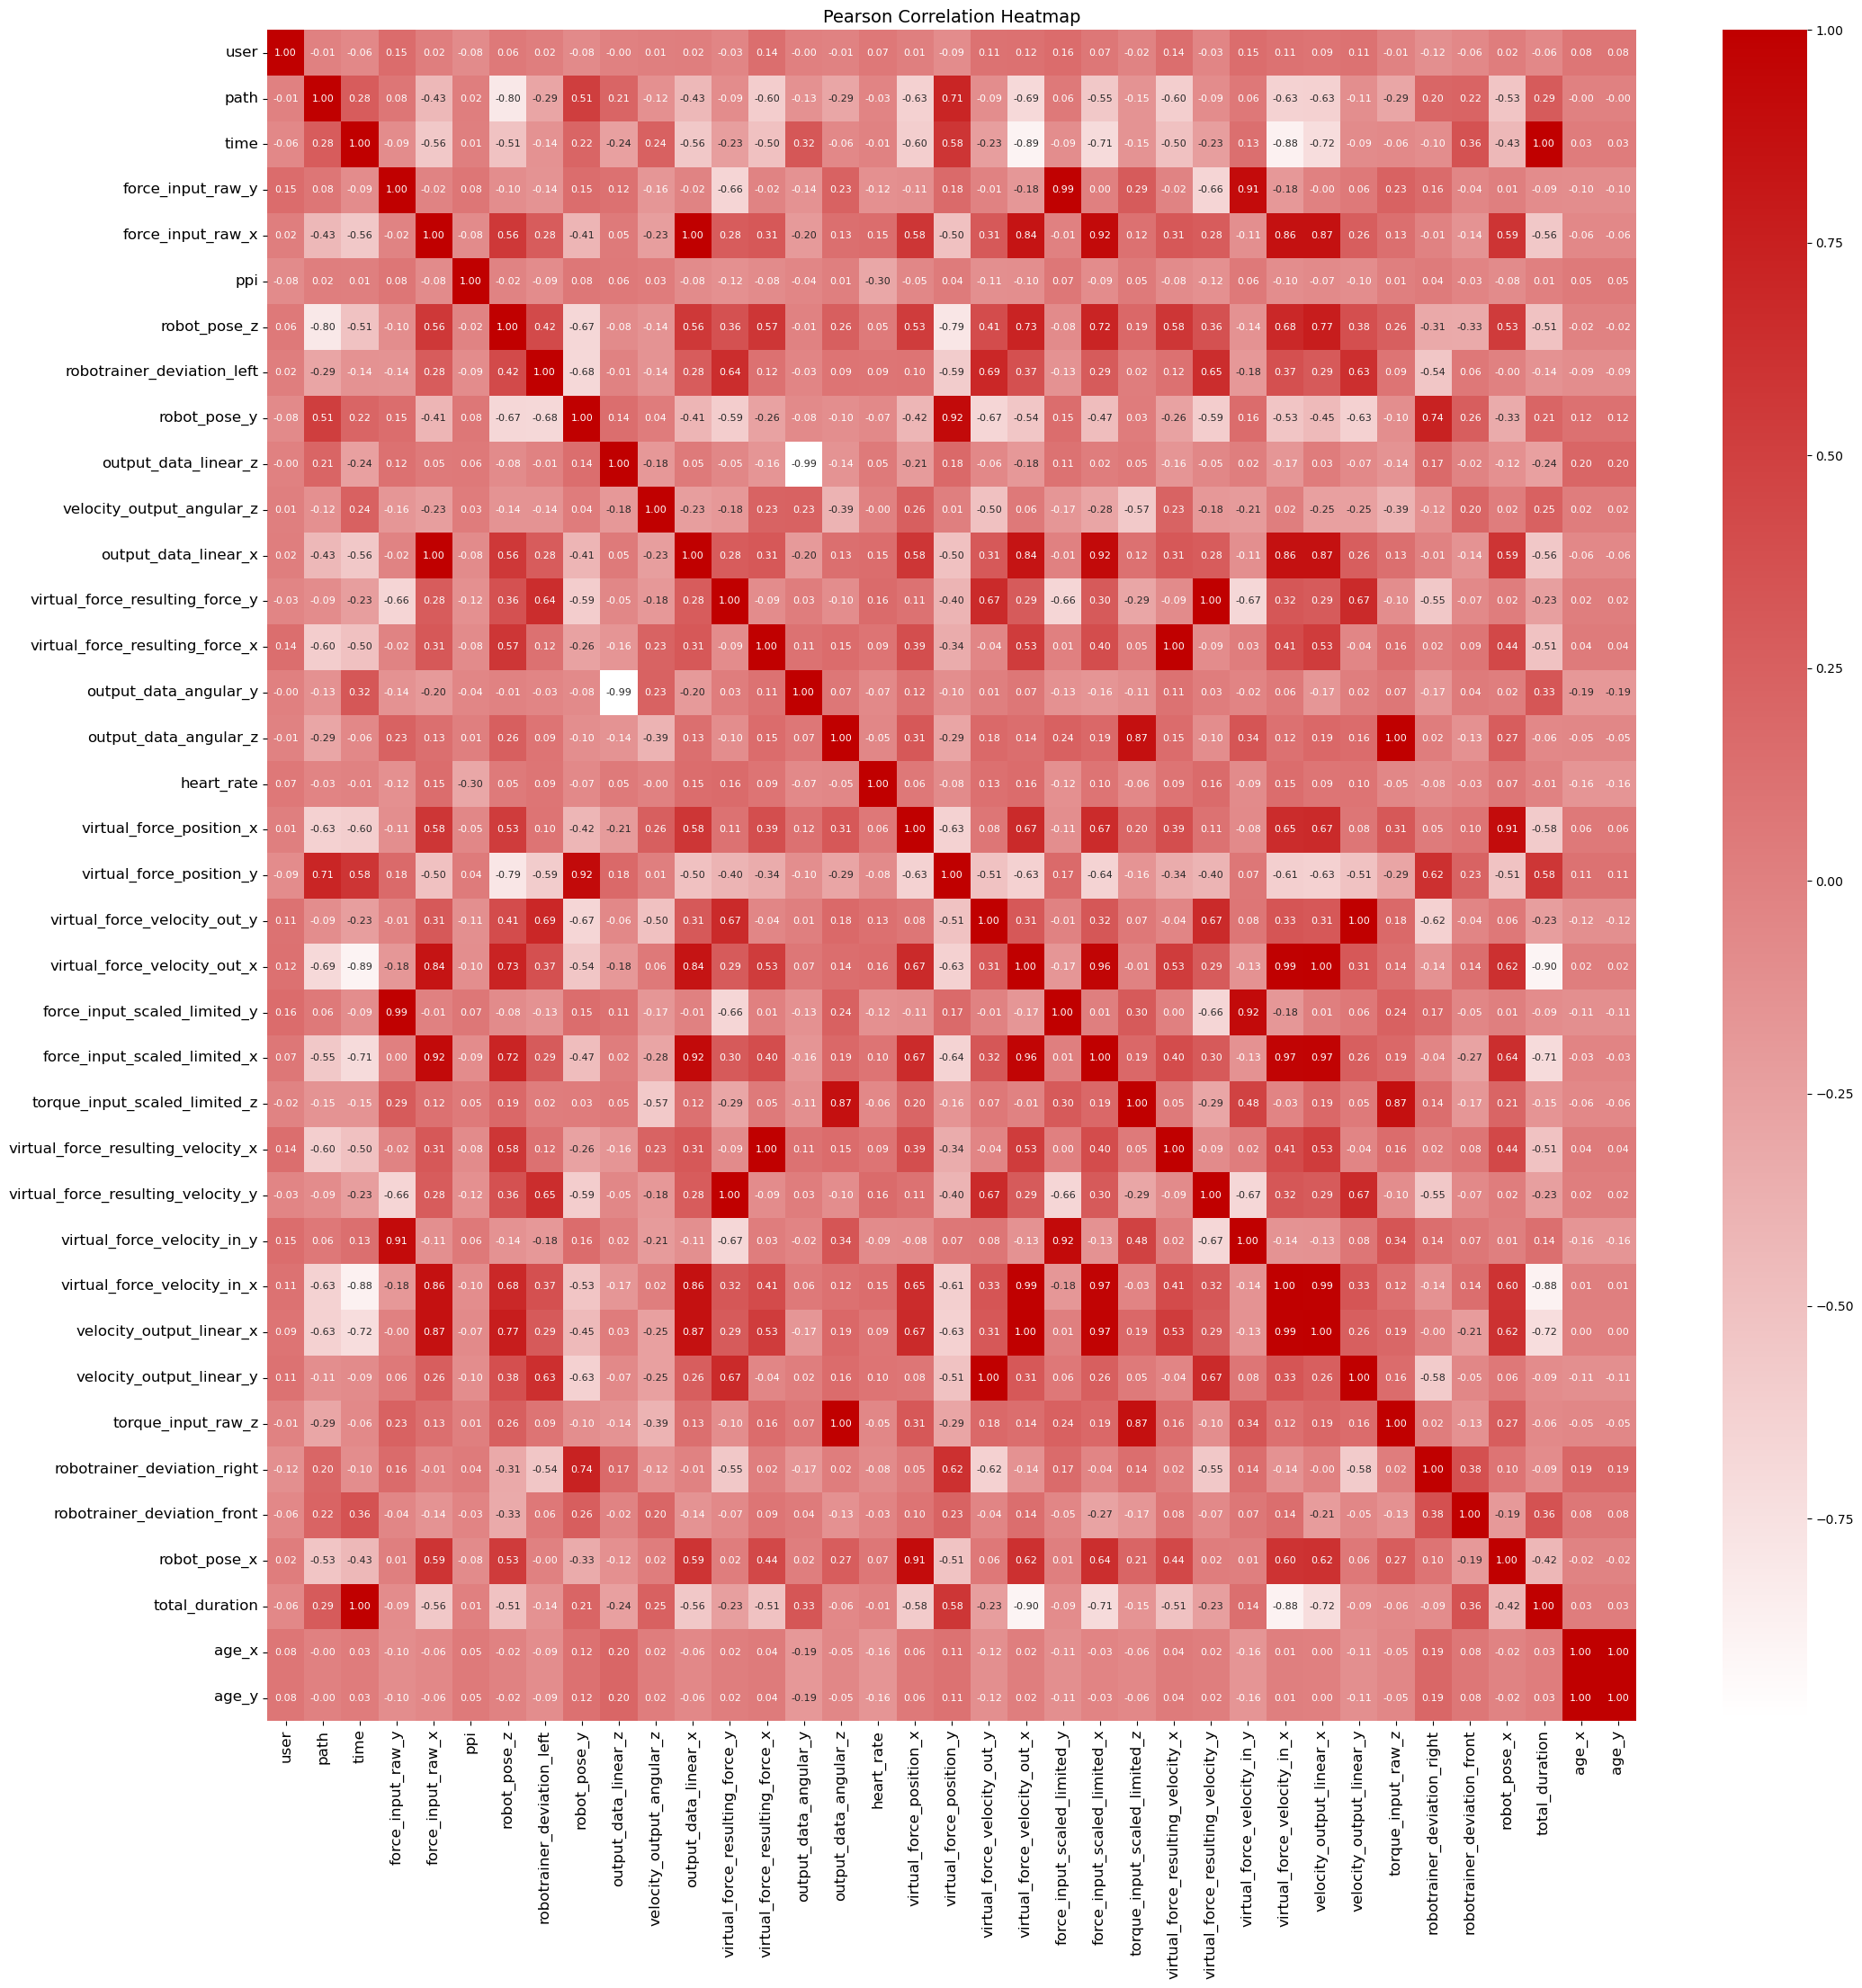

In [32]:
custom_cmap = LinearSegmentedColormap.from_list("custom_reds", ['#ffffff', '#c00000'])

rows, cols = correlation_matrix_robo.shape

fig_width = max(6, cols * 0.6)
fig_height = max(4, rows * 0.6)

plt.figure(figsize=(fig_width, fig_height))

sns.heatmap(
    correlation_matrix_robo,
    annot=True,
    fmt=".2f",
    cmap=custom_cmap,
    cbar=True,
    annot_kws={"size": 8}
)

plt.title("Pearson Correlation Heatmap", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout() 
plt.savefig('figures/pearson_robotrainer.pdf', format='pdf')
plt.show()

## Spearman Correlation
The Spearman correlation measures the monotonic relationship between two variables. It is based on the rank values of the data rather than the actual data values.
- 1: Perfect positive monotonic relationship.
- -1: Perfect negative monotonic relationship.
- 0: No monotonic relationship.

In [33]:
spearman_correlation_matrix = numeric_df.corr(method='spearman')
print(spearman_correlation_matrix)

ID                          Balance Test  Single Leg Stance  \
ID                                                            
Balance Test                    1.000000          -0.333493   
Single Leg Stance              -0.333493           1.000000   
Robotrainer Front              -0.102354           0.208398   
Robotrainer Left                0.131910           0.164117   
Robotrainer Right               0.063492           0.028783   
Hand Grip Left                  0.126984           0.179892   
Hand Grip Right                 0.064604           0.200150   
Jump & Reach                    0.484525          -0.193335   
Tandem Walk                    -0.223864          -0.009963   
Figure 8 Walk                  -0.539009           0.313929   
Jumping Sideways                0.570216          -0.535632   
Throwing Beanbag at Target      0.182341          -0.525363   
Tapping Test                   -0.325301           0.251156   
Ruler Drop Test                -0.309084           0.23

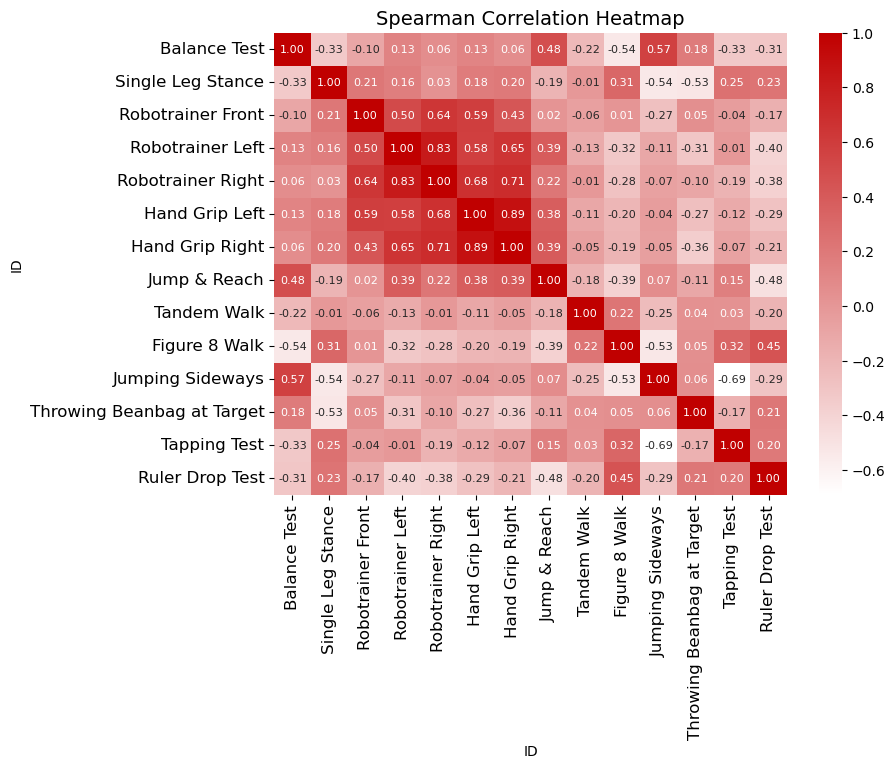

In [34]:
custom_cmap = LinearSegmentedColormap.from_list("custom_reds", ['#ffffff', '#c00000'])

plt.figure(figsize=(8.27, 6))

sns.heatmap(
    spearman_correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap=custom_cmap,  
    cbar=True,
    annot_kws={"size": 8}
)

plt.title("Spearman Correlation Heatmap", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.savefig('figures/pearson_ground_truth.pdf', format='pdf')

plt.show()

In [35]:
spearman_correlation_matrix_robo = df_robotrainer.select_dtypes(include=[np.number]).corr(method='spearman')
print(spearman_correlation_matrix_robo)

                                        user      path      time  \
user                                1.000000 -0.006080 -0.122506   
path                               -0.006080  1.000000  0.582349   
time                               -0.122506  0.582349  1.000000   
force_input_raw_y                   0.160879  0.046324 -0.045437   
force_input_raw_x                   0.089851 -0.520704 -0.954088   
ppi                                -0.053450  0.086211  0.144728   
robot_pose_z                        0.088343 -0.767961 -0.681171   
robotrainer_deviation_left          0.060006 -0.329746 -0.311098   
robot_pose_y                       -0.082486  0.556282  0.475667   
output_data_linear_z                0.001769  0.190268 -0.093646   
velocity_output_angular_z          -0.015189 -0.267293  0.117900   
output_data_linear_x                0.089856 -0.520675 -0.954287   
virtual_force_resulting_force_y    -0.045860  0.076740 -0.165423   
virtual_force_resulting_force_x     0.172472 -0.

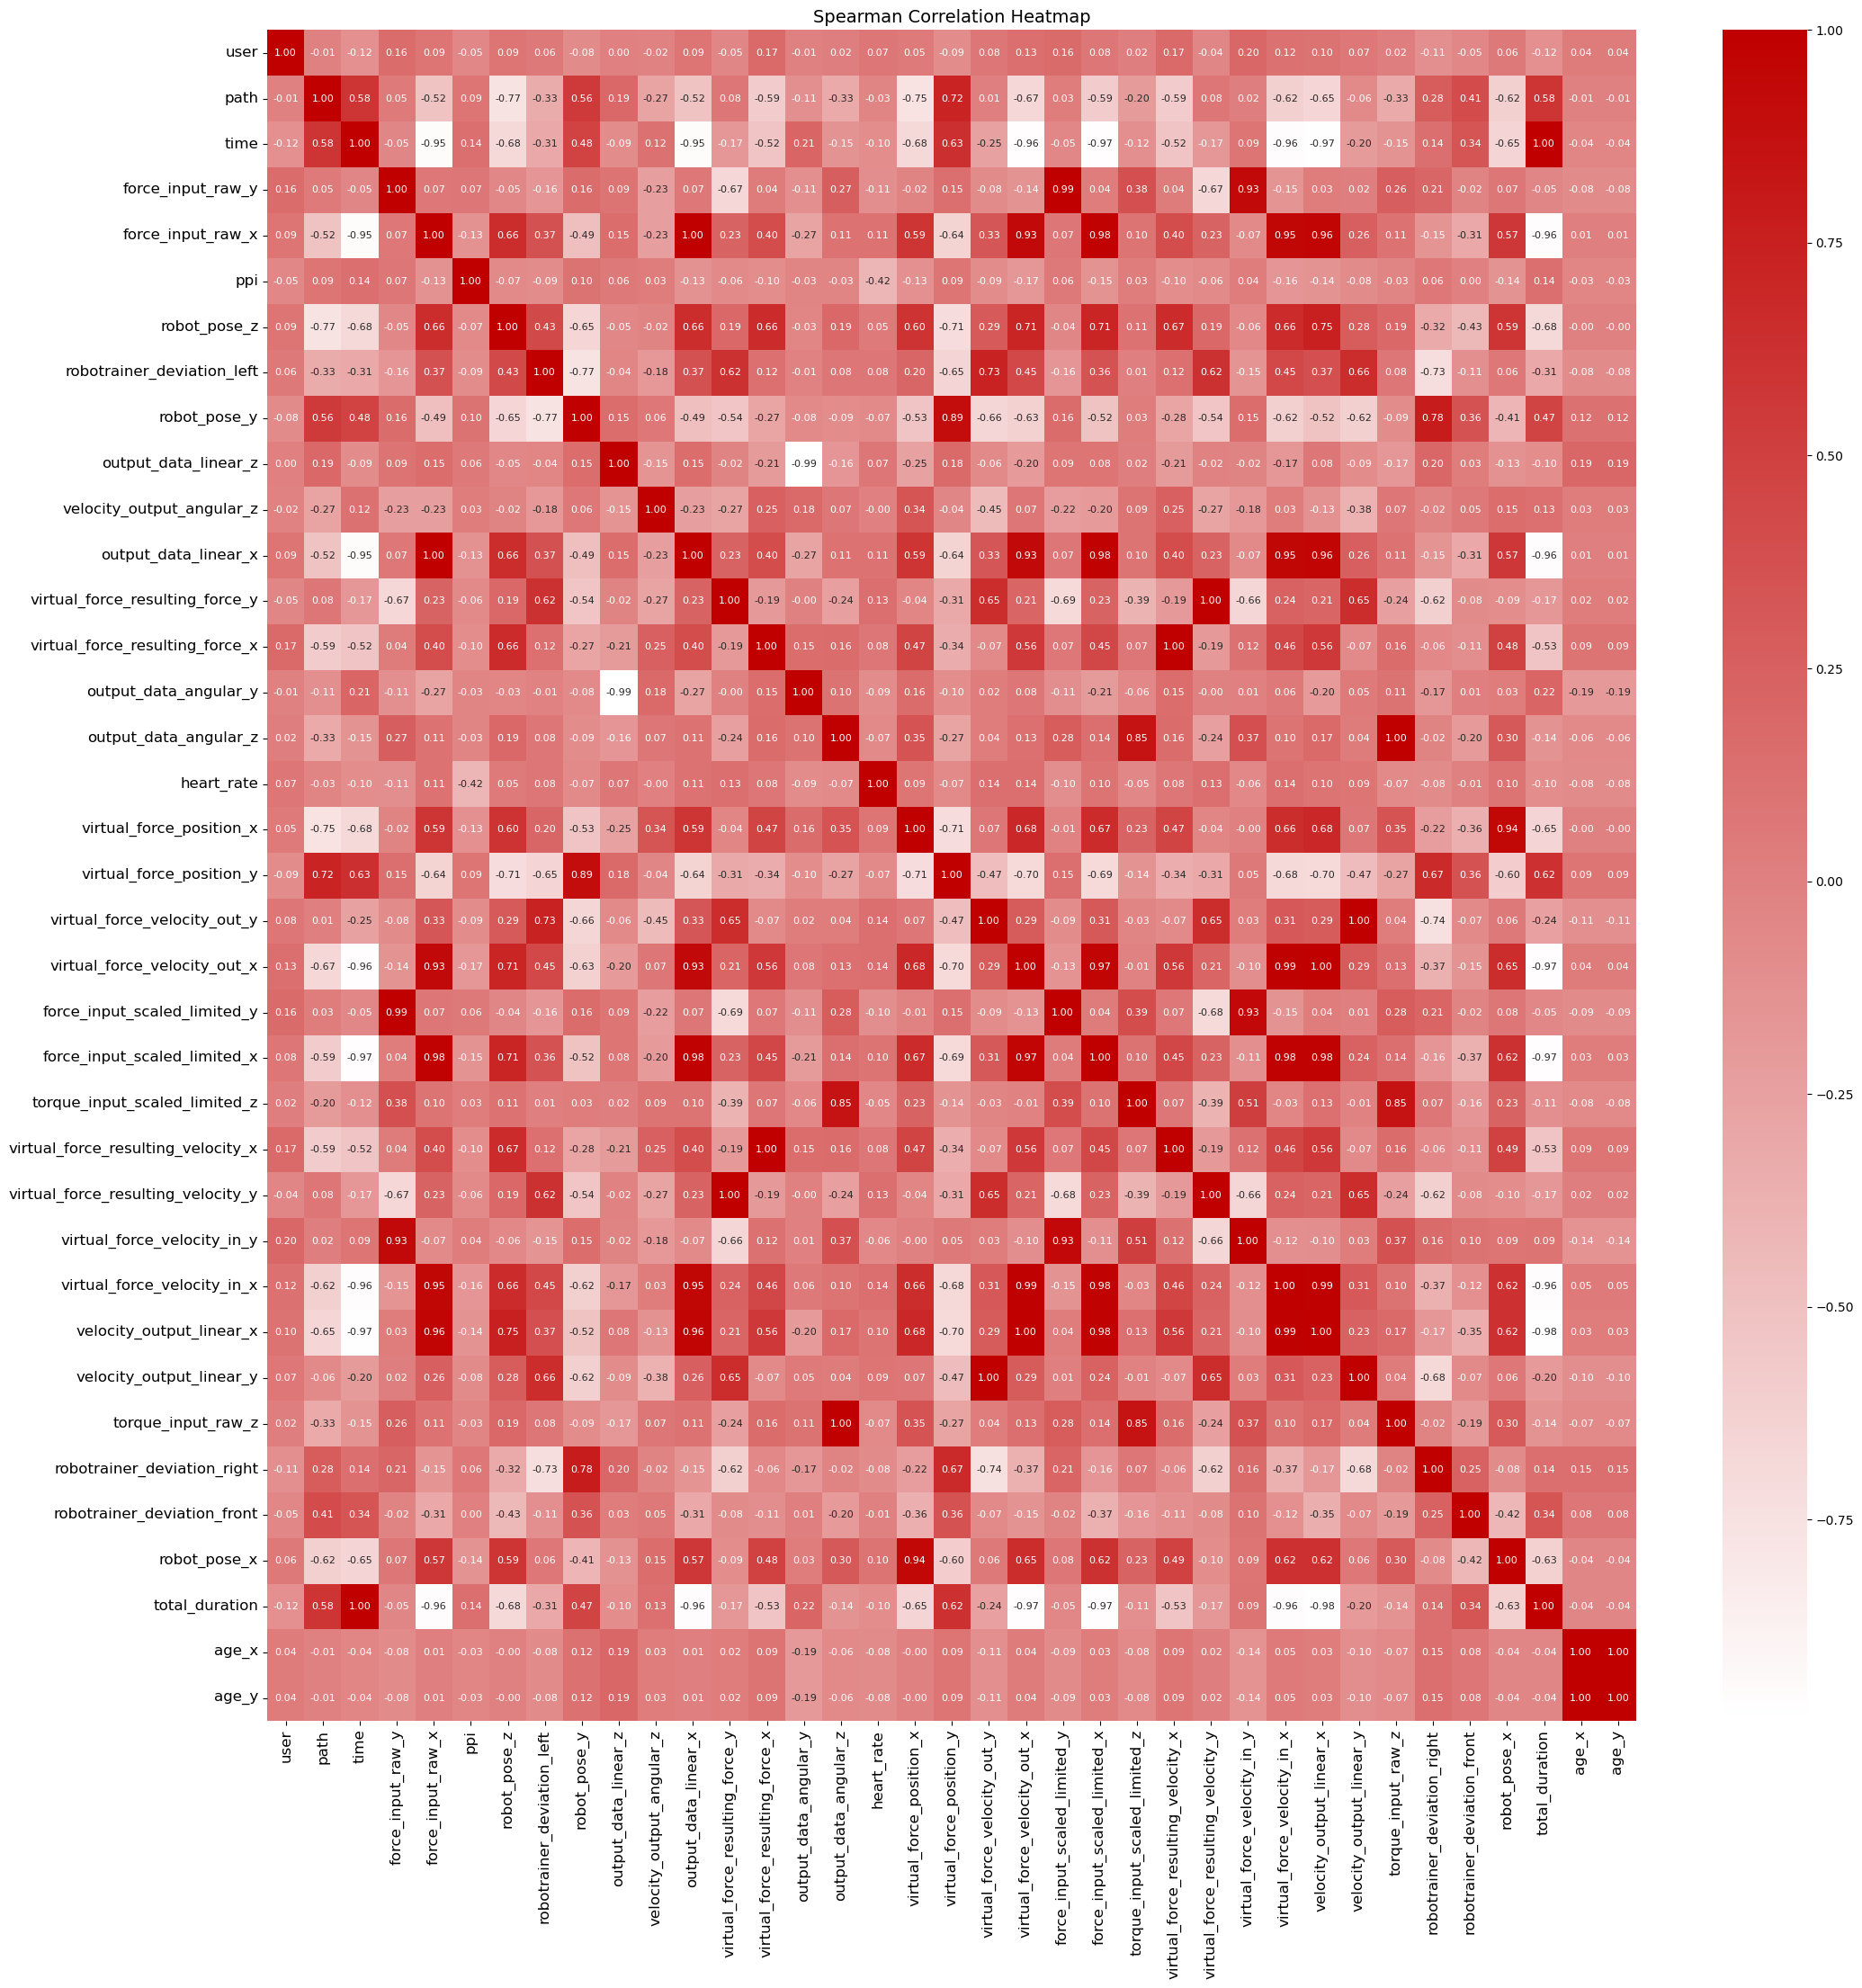

In [36]:
custom_cmap = LinearSegmentedColormap.from_list("custom_reds", ['#ffffff', '#c00000'])

rows, cols = correlation_matrix_robo.shape

fig_width = max(6, cols * 0.6)
fig_height = max(4, rows * 0.6)

plt.figure(figsize=(fig_width, fig_height))

sns.heatmap(
    spearman_correlation_matrix_robo,
    annot=True,
    fmt=".2f",
    cmap=custom_cmap,  
    cbar=True,
    annot_kws={"size": 8}
)

plt.title("Spearman Correlation Heatmap", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


plt.tight_layout() 

plt.savefig('figures/pearson_ground_truth.pdf', format='pdf')

plt.show()

##  Principal Component Analysis (PCA)
Dimensionality reduction technique used to simplify datasets while preserving as much variance as possible. PCA transforms the data into a new coordinate system where the axes (principal components) are ordered by the amount of variance they capture.

In [37]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

# Apply PCA
pca = PCA(n_components=13)  # Adjust the number of components as needed
pca_result = pca.fit_transform(scaled_data)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(
    pca_result,
    columns=[f"PC{i+1}" for i in range(pca.n_components_)],
    index=numeric_df.index
)

print(pca_df)

         PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
1  -2.314457  0.408180  1.023618  1.858403  1.556847  1.317234  0.411083   
2   0.063024 -1.551429  0.167915 -1.419555  1.105528 -0.718162  0.546925   
3   2.236879 -0.661092 -0.341761  1.369300 -1.355919 -0.340149 -0.304733   
4   3.332162  0.751447 -0.805764 -1.294721 -0.763969  1.338869  0.117974   
5  -0.409405 -0.203623 -1.869309  2.806640 -0.492912 -1.932576  0.072955   
6  -2.787913 -0.021296 -0.733535 -0.821689 -1.155270 -0.258550  0.026706   
7  -1.880892  1.704929 -1.859665  0.009902  0.244533  0.432778  0.032649   
8   0.970026 -1.624765  0.639424 -1.402474  0.717044  0.393658 -0.419833   
9   2.743244 -0.640946 -0.312043  2.240135  0.193098  0.975661  0.788242   
10  1.399056  1.559334 -0.144099 -0.198479 -0.704134  0.628018  0.142446   
11 -2.280434 -0.874128 -0.461558  0.209347  0.109129  1.568311  1.400036   
12 -3.406336  1.447531 -1.588029 -0.900942 -0.673775 -0.489423 -0.344280   
13 -0.800350

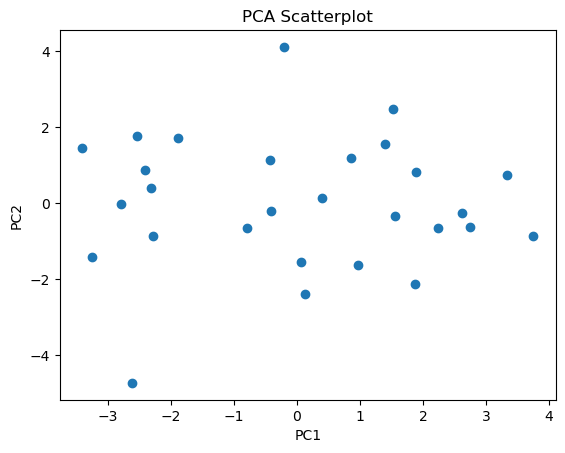

In [38]:
plt.scatter(pca_df['PC1'], pca_df['PC2'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Scatterplot')
plt.show()

In [39]:
loadings = pd.DataFrame(
    pca.components_,
    columns=numeric_df.columns,
    index=[f"PC{i+1}" for i in range(pca.n_components_)]
)
print(loadings)

ID    Balance Test  Single Leg Stance  Robotrainer Front  Robotrainer Left  \
PC1       0.124504          -0.040268           0.315576          0.388877   
PC2       0.457027          -0.450791          -0.179802         -0.110802   
PC3       0.111059          -0.009055           0.342081          0.161018   
PC4      -0.094111          -0.242523           0.185744          0.038034   
PC5       0.278089           0.014954           0.247704          0.059615   
PC6      -0.242721          -0.467888          -0.141279         -0.223616   
PC7       0.397564           0.483411           0.149190         -0.333713   
PC8      -0.089683          -0.144909          -0.106936          0.312179   
PC9      -0.023673           0.032500           0.373759         -0.174583   
PC10      0.424180           0.174093          -0.325461          0.456893   
PC11     -0.086867          -0.181222           0.577447          0.193630   
PC12      0.457700          -0.432777           0.032155        

## Scatterplot

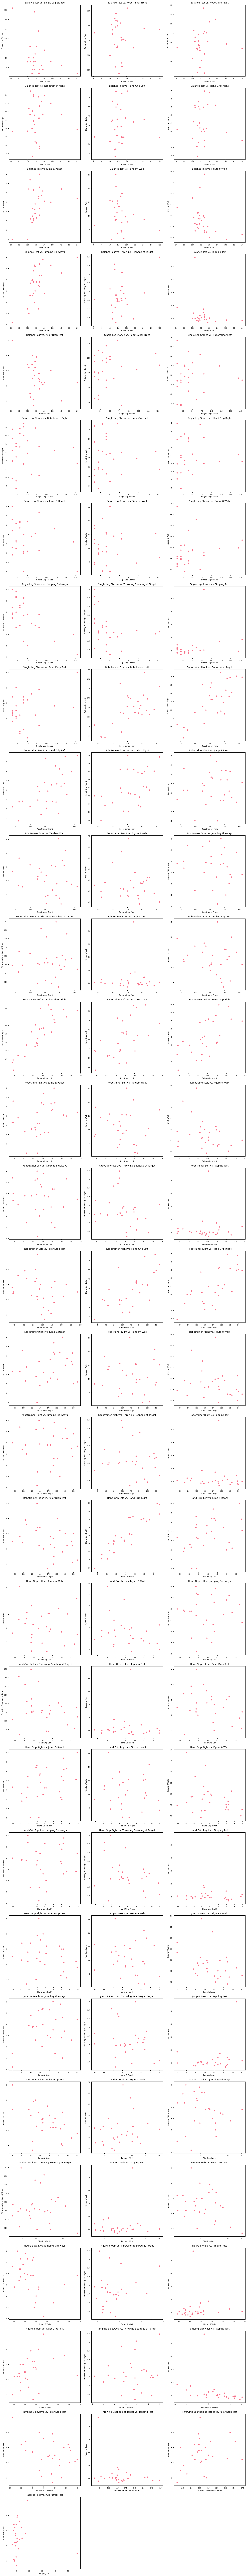

In [40]:
num_cols = 3
combs = list(combinations(numeric_df.columns, 2))
num_rows = (len(combs) + num_cols - 1) // num_cols  

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
axes = axes.flatten()

colors = sns.color_palette("husl", 8)

for idx, (x_col, y_col) in enumerate(combs):
    sns.scatterplot(
        data=numeric_df,
        x=x_col,
        y=y_col,
        color=colors[0],
        ax=axes[idx]
    )
    axes[idx].set_title(f"{x_col} vs. {y_col}", fontsize=10)
    axes[idx].set_xlabel(x_col, fontsize=8)
    axes[idx].set_ylabel(y_col, fontsize=8)
    axes[idx].tick_params(axis='both', labelsize=6)

for ax in axes[len(combs):]:
    ax.axis('off')

plt.tight_layout()
plt.show()

## Correlation between Ground Truth and RoboTrainer

In [41]:
numeric_df = numeric_df.reset_index()
df_robotrainer["user"] = df_robotrainer["user"].astype(str)
numeric_df["index"] = numeric_df["index"].astype(str)
print(numeric_df.columns)

Index(['index', 'Balance Test', 'Single Leg Stance', 'Robotrainer Front',
       'Robotrainer Left', 'Robotrainer Right', 'Hand Grip Left',
       'Hand Grip Right', 'Jump & Reach', 'Tandem Walk', 'Figure 8 Walk',
       'Jumping Sideways', 'Throwing Beanbag at Target', 'Tapping Test',
       'Ruler Drop Test'],
      dtype='object', name='ID')


In [42]:
df_merged = df_robotrainer.merge(numeric_df, left_on="user", right_on="index", how="inner")
df_merged = df_merged.drop(columns=['index'])
print(df_merged)

    user  path  time  force_input_raw_y  force_input_raw_x          ppi  \
0      2     8   0.0         -10.077319          93.212254          NaN   
1      5     1   4.5           4.212586          46.885345          NaN   
2      5     2   4.0           5.931689          52.868197  1407.500000   
3      5     3   3.5          11.262652          59.007991  1097.333333   
4      5     4   2.5          -1.157651          62.080021  2359.000000   
..   ...   ...   ...                ...                ...          ...   
463   28    16   6.0           7.879871          30.172225   906.679630   
464   28    17   6.5          14.185067          31.171210   614.581481   
465   28    18   6.0          -0.209474          36.628060   545.625000   
466   28    19   6.0          -3.443169          46.423700   745.547863   
467   28    20   6.5          -4.032119          42.308031   719.925926   

     robot_pose_z  robotrainer_deviation_left  robot_pose_y  \
0        2.843109                   

In [43]:
num_df = df_merged.select_dtypes(include=['number'])
gt_cols = numeric_df.columns.drop('index')

### Pearson

In [44]:
corr_matrix = num_df.corr().loc[:, gt_cols]
print("Korrelationsmatrix:")
print(corr_matrix)

Korrelationsmatrix:
ID                                  Balance Test  Single Leg Stance  \
path                                   -0.003351           0.000142   
time                                   -0.048059           0.035348   
force_input_raw_y                       0.240490          -0.082010   
force_input_raw_x                       0.116833          -0.062583   
ppi                                     0.021777           0.079427   
robot_pose_z                            0.035635          -0.001432   
robotrainer_deviation_left              0.091071          -0.172007   
robot_pose_y                           -0.118918           0.091906   
output_data_linear_z                   -0.190562           0.195889   
velocity_output_angular_z              -0.029933           0.050965   
output_data_linear_x                    0.116905          -0.062329   
virtual_force_resulting_force_y        -0.046251          -0.007227   
virtual_force_resulting_force_x         0.036811         

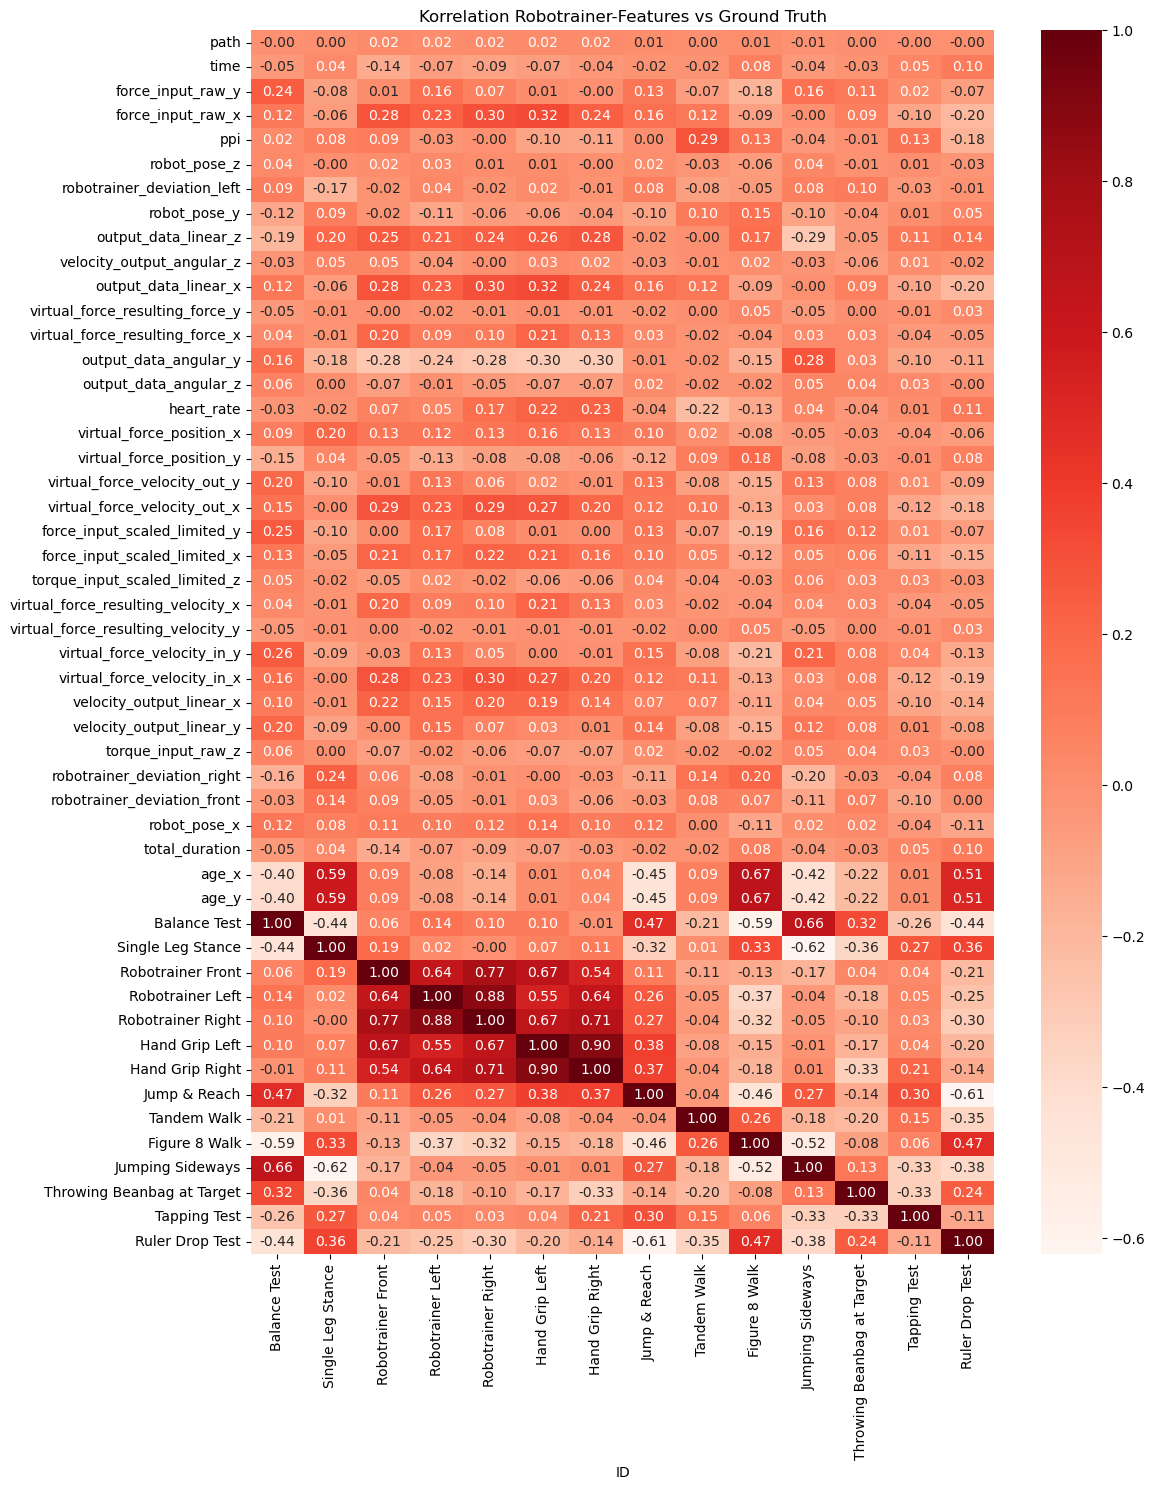

In [45]:
plt.figure(figsize=(12, max(6, len(num_df.columns)*0.3)))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="Reds")
plt.title("Korrelation Robotrainer-Features vs Ground Truth")
plt.tight_layout()

plt.savefig('figures/pearson.pdf', format='pdf')

plt.show()


### Spearman

In [46]:
corr_matrix_spearman = num_df.corr(method="spearman").loc[:, gt_cols]
print("Korrelationsmatrix:")
print(corr_matrix)

Korrelationsmatrix:
ID                                  Balance Test  Single Leg Stance  \
path                                   -0.003351           0.000142   
time                                   -0.048059           0.035348   
force_input_raw_y                       0.240490          -0.082010   
force_input_raw_x                       0.116833          -0.062583   
ppi                                     0.021777           0.079427   
robot_pose_z                            0.035635          -0.001432   
robotrainer_deviation_left              0.091071          -0.172007   
robot_pose_y                           -0.118918           0.091906   
output_data_linear_z                   -0.190562           0.195889   
velocity_output_angular_z              -0.029933           0.050965   
output_data_linear_x                    0.116905          -0.062329   
virtual_force_resulting_force_y        -0.046251          -0.007227   
virtual_force_resulting_force_x         0.036811         

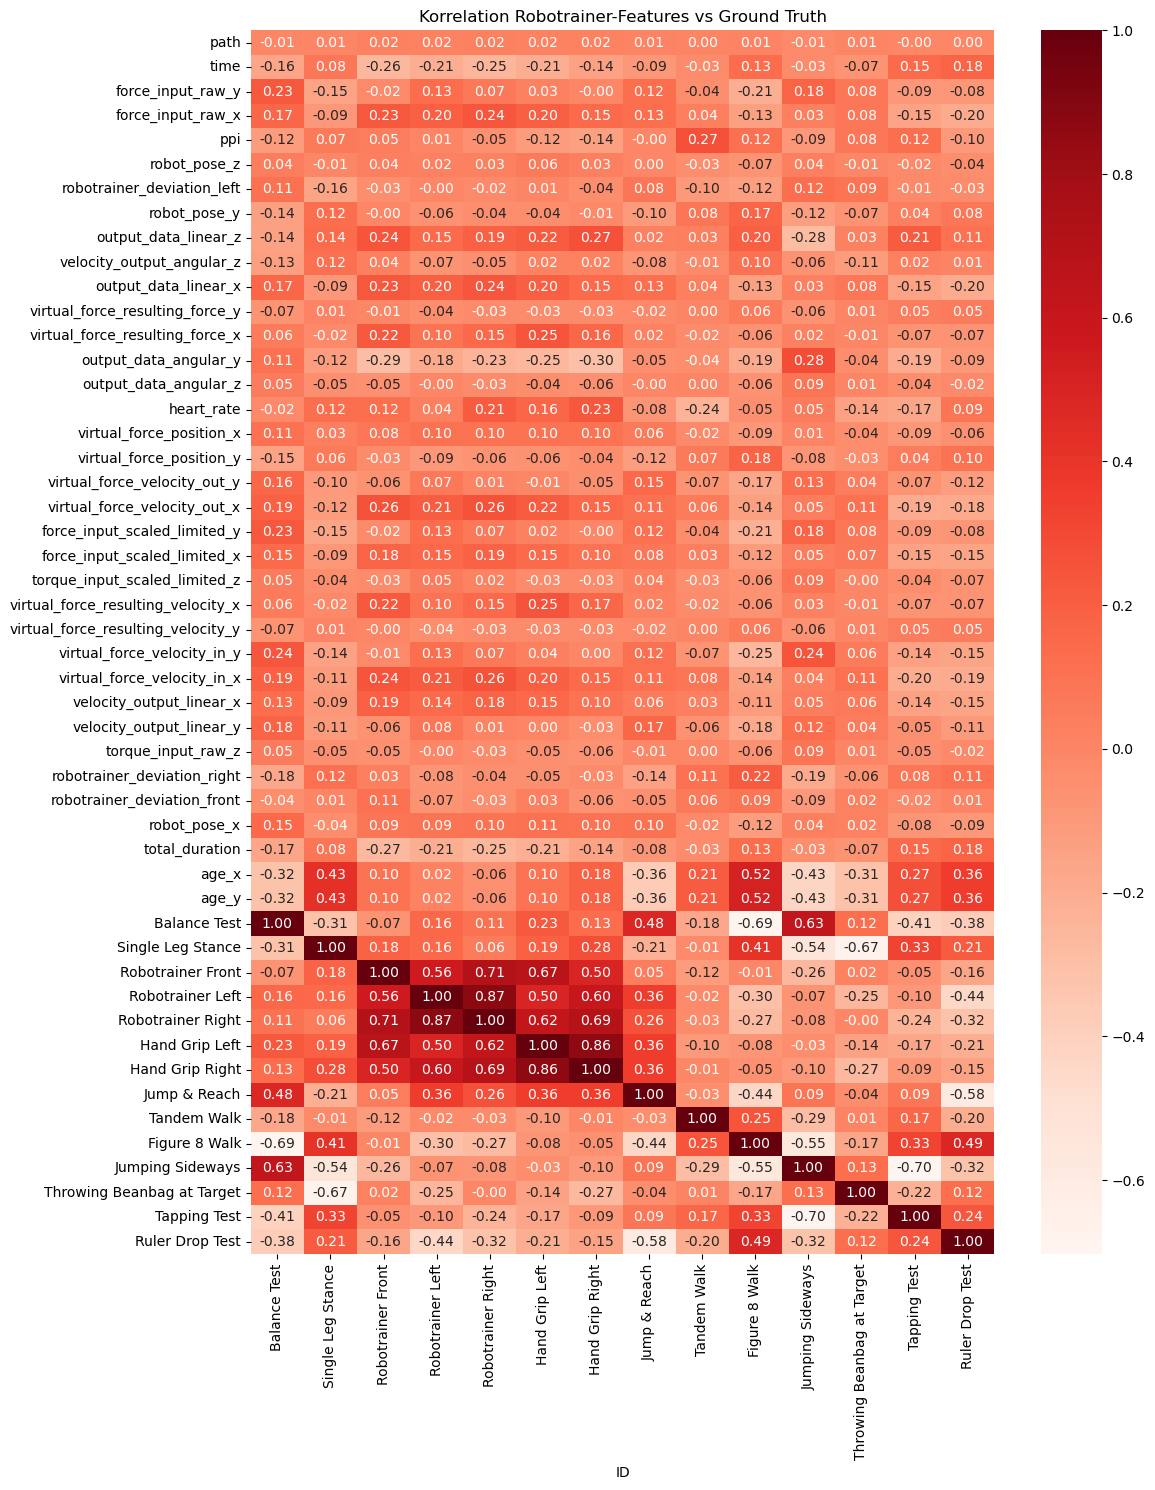

In [47]:
plt.figure(figsize=(12, max(6, len(num_df.columns)*0.3)))
sns.heatmap(corr_matrix_spearman, annot=True, fmt=".2f", cmap="Reds")
plt.title("Korrelation Robotrainer-Features vs Ground Truth")
plt.tight_layout()

plt.savefig('figures/spearman.pdf', format='pdf')

plt.show()